In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [2]:
# Creiamo il modello in modalità sequenziale
model = keras.Sequential(name='MLP_multistrato_MNIST')

# aggiungiamo il layer di ingresso
model.add(keras.Input(shape=(784,)))

# aggiungiamo il primo layer denso con 64 unità
model.add(layers.Dense(64, activation="relu", name='denso1_relu'))

# secondo layer denso con 64 unità
model.add(layers.Dense(64, activation="relu", name='denso2_relu'))

# Layer di output con attivazione lineare
model.add(layers.Dense(10, name='denso3_lineare'))

# N:B. il modello è già completo così

2023-06-05 09:45:09.843358: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 619 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:03:00.0, compute capability: 8.6


In [3]:
model.summary()

Model: "MLP_multistrato_MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 denso1_relu (Dense)         (None, 64)                50240     
                                                                 
 denso2_relu (Dense)         (None, 64)                4160      
                                                                 
 denso3_lineare (Dense)      (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


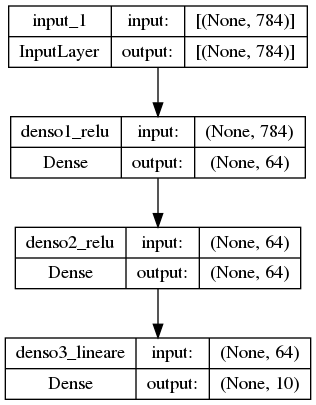

In [4]:
# Plot del grafo della rete
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)


In [5]:
# creiamo il data set
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

In [6]:
# Abilito l'early stopping: interruzione anticipata dell'addestramento se la loss di
# validazione non diminuisce più
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"]
)

history = model.fit(x_train, y_train, 
                    batch_size=64, 
                    epochs=15, 
                    validation_split=0.2,
                    callbacks=[callback])

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/15


2023-06-05 09:45:13.963201: E tensorflow/stream_executor/cuda/cuda_blas.cc:232] failed to create cublas handle: CUBLAS_STATUS_NOT_INITIALIZED
2023-06-05 09:45:13.963299: E tensorflow/stream_executor/cuda/cuda_blas.cc:234] Failure to initialize cublas may be due to OOM (cublas needs some free memory when you initialize it, and your deep-learning framework may have preallocated more than its fair share), or may be because this binary was not built with support for the GPU in your machine.
2023-06-05 09:45:13.963352: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at matmul_op_impl.h:438 : INTERNAL: Attempting to perform BLAS operation using StreamExecutor without BLAS support


InternalError: Graph execution error:

Detected at node 'MLP_multistrato_MNIST/denso1_relu/MatMul' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/traitlets/config/application.py", line 982, in launch_instance
      app.start()
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1899, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_8594/1605861678.py", line 11, in <module>
      history = model.fit(x_train, y_train,
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/keras/engine/training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/keras/engine/training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/keras/engine/sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/keras/engine/functional.py", line 458, in call
      return self._run_internal_graph(
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/keras/engine/functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/rpirrone/virtualenvs/tf2/lib/python3.10/site-packages/keras/layers/core/dense.py", line 221, in call
      outputs = tf.matmul(a=inputs, b=self.kernel)
Node: 'MLP_multistrato_MNIST/denso1_relu/MatMul'
Attempting to perform BLAS operation using StreamExecutor without BLAS support
	 [[{{node MLP_multistrato_MNIST/denso1_relu/MatMul}}]] [Op:__inference_train_function_730]

In [ ]:
history.history

{'loss': [0.36556363105773926,
  0.17241381108760834,
  0.12193342298269272,
  0.09504763782024384,
  0.07795005291700363,
  0.06614432483911514,
  0.057145990431308746,
  0.05081906542181969,
  0.045094456523656845,
  0.03923878073692322,
  0.03474123775959015,
  0.030911438167095184,
  0.027966702356934547,
  0.02313799224793911,
  0.021458154544234276],
 'accuracy': [0.8971041440963745,
  0.950083315372467,
  0.9637500047683716,
  0.9710000157356262,
  0.9757916927337646,
  0.9794374704360962,
  0.9824791550636292,
  0.9844791889190674,
  0.9864583611488342,
  0.9882083535194397,
  0.9894166588783264,
  0.9904375076293945,
  0.9917708039283752,
  0.9926875233650208,
  0.9934791922569275],
 'val_loss': [0.19723911583423615,
  0.14205405116081238,
  0.11768412590026855,
  0.12255002558231354,
  0.11710619181394577,
  0.10348374396562576,
  0.10394527018070221,
  0.1104821264743805,
  0.1086709275841713,
  0.10871783643960953,
  0.11638642102479935,
  0.12204909324645996,
  0.120944246

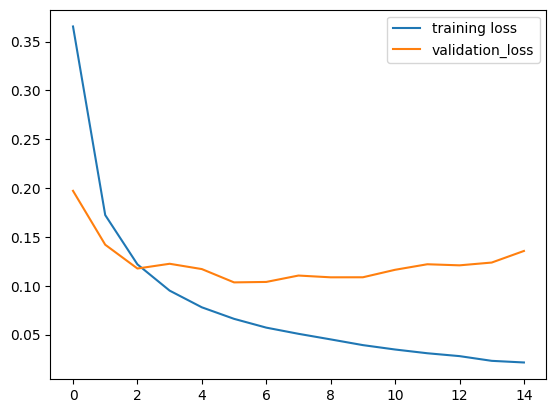

In [ ]:
epochs = np.arange(21)

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.legend(loc='upper right')
plt.show()

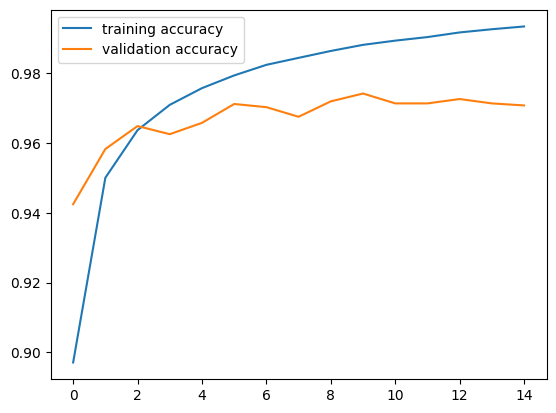

In [ ]:

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='upper left')
plt.show()